## Create SBGN file

In [18]:
from __future__ import absolute_import, print_function

import libsbgnpy.libsbgn as libsbgn 
from libsbgnpy.libsbgnTypes import Language, GlyphClass, ArcClass, Orientation

# create empty sbgn
sbgn = libsbgn.sbgn()

# create map, set language and set in sbgn
map = libsbgn.map()
map.set_language(Language.PD)
sbgn.set_map(map)

# create a bounding box for the map
# <bbox x="0" y="0" w="363" h="253"/>
# [1] de novo and set all attributes
# box = libsbgn.bbox()
# box.set_x(0)
# box.set_y(0)
# box.set_w(363)
# box.set_h(253)
# [2] de novo with attributes at creation
box = libsbgn.bbox(x=0, y=0, w=363, h=253)
map.set_bbox(box)

# create some glyphs
# class attribute is named 'class_' ! in glyphs and arcs
'''
	<glyph class="simple chemical" id="glyph1">
		<label text="Ethanol"/> <!-- fontsize="" etc -->
		<!-- Line breaks are allowed in the text attribute -->
		<bbox x="40" y="120" w="60" h="60"/>
	</glyph>
'''
# glyphs with labels
g = libsbgn.glyph(class_=GlyphClass.SIMPLE_CHEMICAL, id='glyph1')
g.set_label(libsbgn.label(text='Ethanol'))
g.set_bbox(libsbgn.bbox(x=40, y=120, w=60, h=60))
map.add_glyph(g)

g = libsbgn.glyph(class_=GlyphClass.SIMPLE_CHEMICAL, id='glyph_ethanal')
g.set_label(libsbgn.label(text='Ethanal'))
g.set_bbox(libsbgn.bbox(x=220, y=110, w=60, h=60))
map.add_glyph(g)

g = libsbgn.glyph(class_=GlyphClass.MACROMOLECULE, id='glyph_adh1')
g.set_label(libsbgn.label(text='ADH1'))
g.set_bbox(libsbgn.bbox(x=106, y=20, w=108, h=60))
map.add_glyph(g)

g = libsbgn.glyph(class_=GlyphClass.SIMPLE_CHEMICAL, id='glyph_h')
g.set_label(libsbgn.label(text='H+'))
g.set_bbox(libsbgn.bbox(x=220, y=190, w=60, h=60))
map.add_glyph(g)

g = libsbgn.glyph(class_=GlyphClass.SIMPLE_CHEMICAL, id='glyph_nad')
g.set_label(libsbgn.label(text='NAD+'))
g.set_bbox(libsbgn.bbox(x=40, y=190, w=60, h=60))
map.add_glyph(g)

g = libsbgn.glyph(class_=GlyphClass.SIMPLE_CHEMICAL, id='glyph_nadh')
g.set_label(libsbgn.label(text='NADH'))
g.set_bbox(libsbgn.bbox(x=300, y=150, w=60, h=60))
map.add_glyph(g)

# glyph with ports (process)
g = libsbgn.glyph(class_=GlyphClass.PROCESS, id='pn1', 
                  orientation=Orientation.HORIZONTAL)
g.set_bbox(libsbgn.bbox(x=148, y=168, w=24, h=24))
g.add_port(libsbgn.port(x=136, y=180, id="pn1.1"))
g.add_port(libsbgn.port(x=184, y=180, id="pn1.2"))
map.add_glyph(g)

# arcs
# create arcs and set the start and end points
a = libsbgn.arc(class_=ArcClass.CONSUMPTION, source="glyph1", target="pn1.1", id="a01")
a.set_start(libsbgn.startType(x=98, y=160))
a.set_end(libsbgn.endType(x=136, y=180))
map.add_arc(a)

a = libsbgn.arc(class_=ArcClass.PRODUCTION, source="pn1.2", target="glyph_nadh", id="a02")
a.set_start(libsbgn.startType(x=184, y=180))
a.set_end(libsbgn.endType(x=300, y=180))
map.add_arc(a)

a = libsbgn.arc(class_=ArcClass.CATALYSIS, source="glyph_adh1", target="pn1", id="a03")
a.set_start(libsbgn.startType(x=160, y=80))
a.set_end(libsbgn.endType(x=160, y=168))
map.add_arc(a)

a = libsbgn.arc(class_=ArcClass.PRODUCTION, source="pn1.2", target="glyph_h", id="a04")
a.set_start(libsbgn.startType(x=184, y=180))
a.set_end(libsbgn.endType(x=224, y=202))
map.add_arc(a)

a = libsbgn.arc(class_=ArcClass.PRODUCTION, source="pn1.2", target="glyph_ethanal", id="a05")
a.set_start(libsbgn.startType(x=184, y=180))
a.set_end(libsbgn.endType(x=224, y=154))
map.add_arc(a)

a = libsbgn.arc(class_=ArcClass.CONSUMPTION, source="glyph_nad", target="pn1.1", id="a06")
a.set_start(libsbgn.startType(x=95, y=202))
a.set_end(libsbgn.endType(x=136, y=180))
map.add_arc(a)

# write everything to a tmp file
import tempfile
f_out = tempfile.NamedTemporaryFile(suffix=".sbgn")
sbgn.write_file(f_out.name)

# SBGN string
The SBGN string can be generated from the `sbgn` object via

In [20]:
from libsbgnpy import utils
sbgn_str = utils.write_to_string(sbgn)

In [21]:
# print the xml string
from pygments import highlight
from pygments.lexers import PythonLexer
from pygments.formatters import HtmlFormatter

def pprint_xml(xml_str):
    """ Helper function for highlighted xml. """
    IPython.display.display(HTML('<style type="text/css">{}</style>{}'.format(
        HtmlFormatter().get_style_defs('.highlight'),
        highlight(xml_str, PythonLexer(), HtmlFormatter()))))

pprint_xml(sbgn_str)

## Render SBGN
SBGN images can be renderd via the `render` module.

SBGN rendered: /tmp/tmp3BjnHG.png


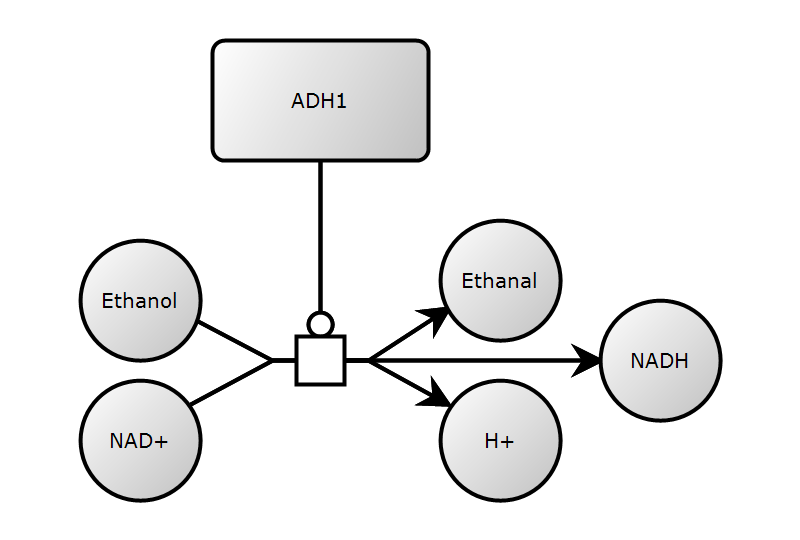

In [28]:
## Render SBGN
from libsbgnpy import render
import tempfile
f_png = tempfile.NamedTemporaryFile(suffix=".png")
render.render_sbgn(sbgn, image_file=f_png.name, 
                   file_format="png")
from IPython.display import Image
image = Image(f_png.name, width=500)
image